In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_nov_dec = pd.read_csv("data/flights_2018_nov_dec_raw.csv")
df_jan = pd.read_csv("data/flights_2018_jan_raw.csv")

/Users/louisrossi/opt/anaconda3/envs/ml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df = pd.concat([df_nov_dec, df_jan]).reset_index().drop(columns=["index"])

In [7]:
df_ = df.sample(frac = 0.05)

In [8]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

In [9]:
def missing(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_ = pd.concat([n_missing, p_missing],axis=1, keys = ['number','percent'])
    return missing_

In [12]:
missing(df_)

,number,percent
no_name,94476,1.000000
first_dep_time,93904,0.993946
longest_add_gtime,93904,0.993946
total_add_gtime,93904,0.993946
cancellation_code,93720,0.991998
late_aircraft_delay,76849,0.813424
security_delay,76849,0.813424
nas_delay,76849,0.813424
weather_delay,76849,0.813424
carrier_delay,76849,0.813424


In [13]:
from scipy import stats
import seaborn as sns
arr_delay = df_.arr_delay

In [14]:
stats.kstest(arr_delay,stats.norm.cdf)

KstestResult(statistic=nan, pvalue=nan)

In [15]:
stats.shapiro(arr_delay)

/Users/louisrossi/opt/anaconda3/envs/ml/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [16]:
sample = df.sample(frac=0.05)
stats.shapiro(sample['arr_delay'])

#fail to reject the null hypothesis that data is normally dist

ShapiroResult(statistic=nan, pvalue=1.0)

(-300.0, 300.0)

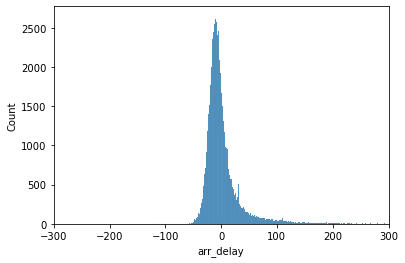

In [17]:
sns.histplot(arr_delay)
plt.xlim(-300, 300)

In [18]:
import datetime as dt
from datetime import date
from datetime import time

In [19]:
df['fl_date'] = pd.to_datetime(df['fl_date'])

In [22]:
type(df.fl_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
df['month'] = df['fl_date'].dt.month
df['month'].head()

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

In [24]:
monthly_count = df.groupby(['month'])['arr_delay'].count()

In [25]:
monthly_count = pd.DataFrame(monthly_count)
monthly_count

,arr_delay
month,
1,599996
11,629909
12,639995


<AxesSubplot:xlabel='month', ylabel='arr_delay'>

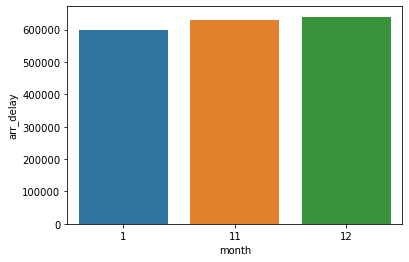

In [26]:
sns.barplot(x= monthly_count.index,y=monthly_count['arr_delay'])

<AxesSubplot:xlabel='month', ylabel='arr_delay'>

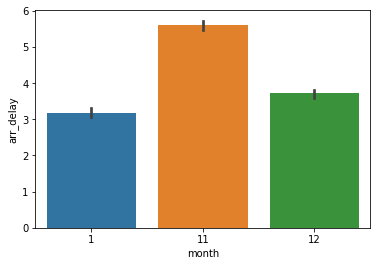

In [27]:
monthly_avg = df.groupby(['month'])['arr_delay'].mean()
sns.barplot(x=df['month'],y=df['arr_delay'])

<AxesSubplot:xlabel='taxi_out', ylabel='Count'>

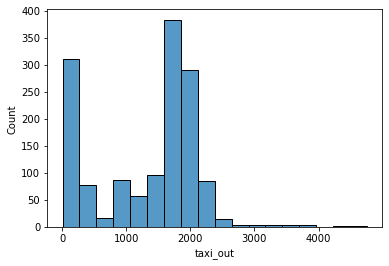

In [28]:
task4a = df.groupby(['dep_time'])['taxi_out'].count()
sns.histplot(task4a)

<AxesSubplot:xlabel='dep_time', ylabel='taxi_out'>

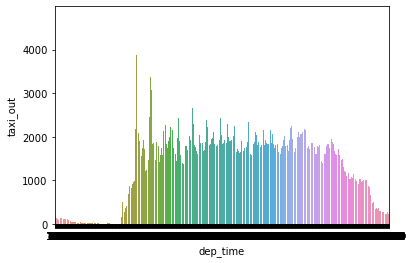

In [29]:
task4a_count = pd.DataFrame(task4a)
sns.barplot(x=task4a_count.index,y=task4a_count['taxi_out'])

<AxesSubplot:xlabel='dep_time', ylabel='taxi_out'>

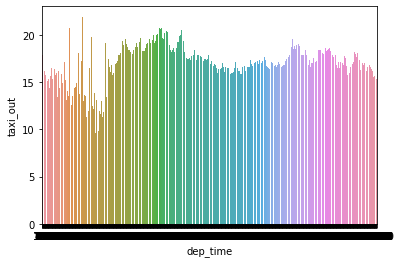

In [30]:
sns.barplot(x=df['dep_time'],y=df['taxi_out'], ci=None)